# <center> **Итоговый проект (PJ-04)**

# <center> Прогнозирование одобрения кредита

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

В основе проекта стоит задача, которая часто встаёт перед аналитиками, работающими в банковском секторе. Банки хранят огромные объёмы информации о своих клиентах. Эти данные можно использовать для того, чтобы осуществлять прогнозирование одобрения кредита.

Прогнозирование одобрения кредита — одна из проблем, которую машинное обучение может решать для увеличения прибыли в бизнесе, таком как банки и финансовые учреждения. Прогнозирование одобрения кредита означает использование данных кредитной истории заемщиков и алгоритмов для создания интеллектуальной системы, которая может определять одобрение кредита. Поэтому попробуем качественно решить задачу прогнозирования одобрения кредита с помощью машинного обучения. Потому что очевидно банкам хотелось бы уметь выбирать среди клиентов именно тех, которые с наибольшей вероятностью способны к оформлению кредита и дальнейшему его погашению.

Машинное обучение помогает в большом потоке информации анализировать огромное количество данных о клиентах финансовых организаций, определять категории клиентов и выбирать правильную стратегию взаимодействия с ними.

Прогнозирование одобрения кредита включает анализ различных факторов, таких как финансовая история заявителя, доход, кредитный рейтинг, статус занятости и другие соответствующие атрибуты. Используя исторические данные о кредитах и ​​применяя алгоритмы машинного обучения, компании могут создавать модели для определения одобрения кредитов для новых заявителей.

Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако в нашем распоряжении будет набор данных, которые принадлежат реальному банку, но используются в обучающих целях.


**Бизнес-задача:** произвести классификацию существующих клиентов и определить характеристики, по которым можно выявить клиентов, наиболее склонных к получению кредита.

**Техническая задача для вас как для специалиста в Data Science:** построить модель классификации клиентов на основе данных банка и модель, позволяющую прогнозировать одобрение кредита.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных..
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого каждой группы клиентов.
4. Построить модели машинного обучения, решающих задачу классификации и прогнозирования одобрения кредита.
5. Спроектировать процесс предсказания одобрения кредита и протестировать полученную модель.




## Данные и их описание

Начнём наше исследование со знакомства с данными. Данные представляют собой таблицу в формате CSV и разделителем ";".

В целом представленные данные можно разделить на несколько групп.

**Данные о клиентах банка:**

* age (возраст);
* job (сфера занятости);
* marital (семейное положение);
* education (уровень образования);
* default (имеется ли просроченный кредит);
* housing (имеется ли кредит на жильё);
* loan (имеется ли кредит на личные нужды);
* balance (баланс).

**Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:**

* contact (тип контакта с клиентом);
* month (месяц, в котором был последний контакт);
* day (день, в который был последний контакт);
* duration (продолжительность контакта в секундах).

**Прочие признаки:**

* campaign (количество контактов с этим клиентом в течение текущей кампании);
* pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
* previous (количество контактов до текущей кампании)
* poutcome (результат прошлой маркетинговой кампании).

**Целевую переменную** **_'Loan_Status'_**, которая будет определять возможность одобрения кредита необходимо будет сформировать в процессе отбора и преобразования признаков.

Именно этот мы будем пытаться предсказать в конце данного проекта.

Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

### Чтение данных

In [21]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,"1,00 $",yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,"733,00 $",no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,"29,00 $",no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0 $,no,yes,cellular,8,may,9,2,172,5,failure,no


### Поиск пропусков в данных

In [3]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

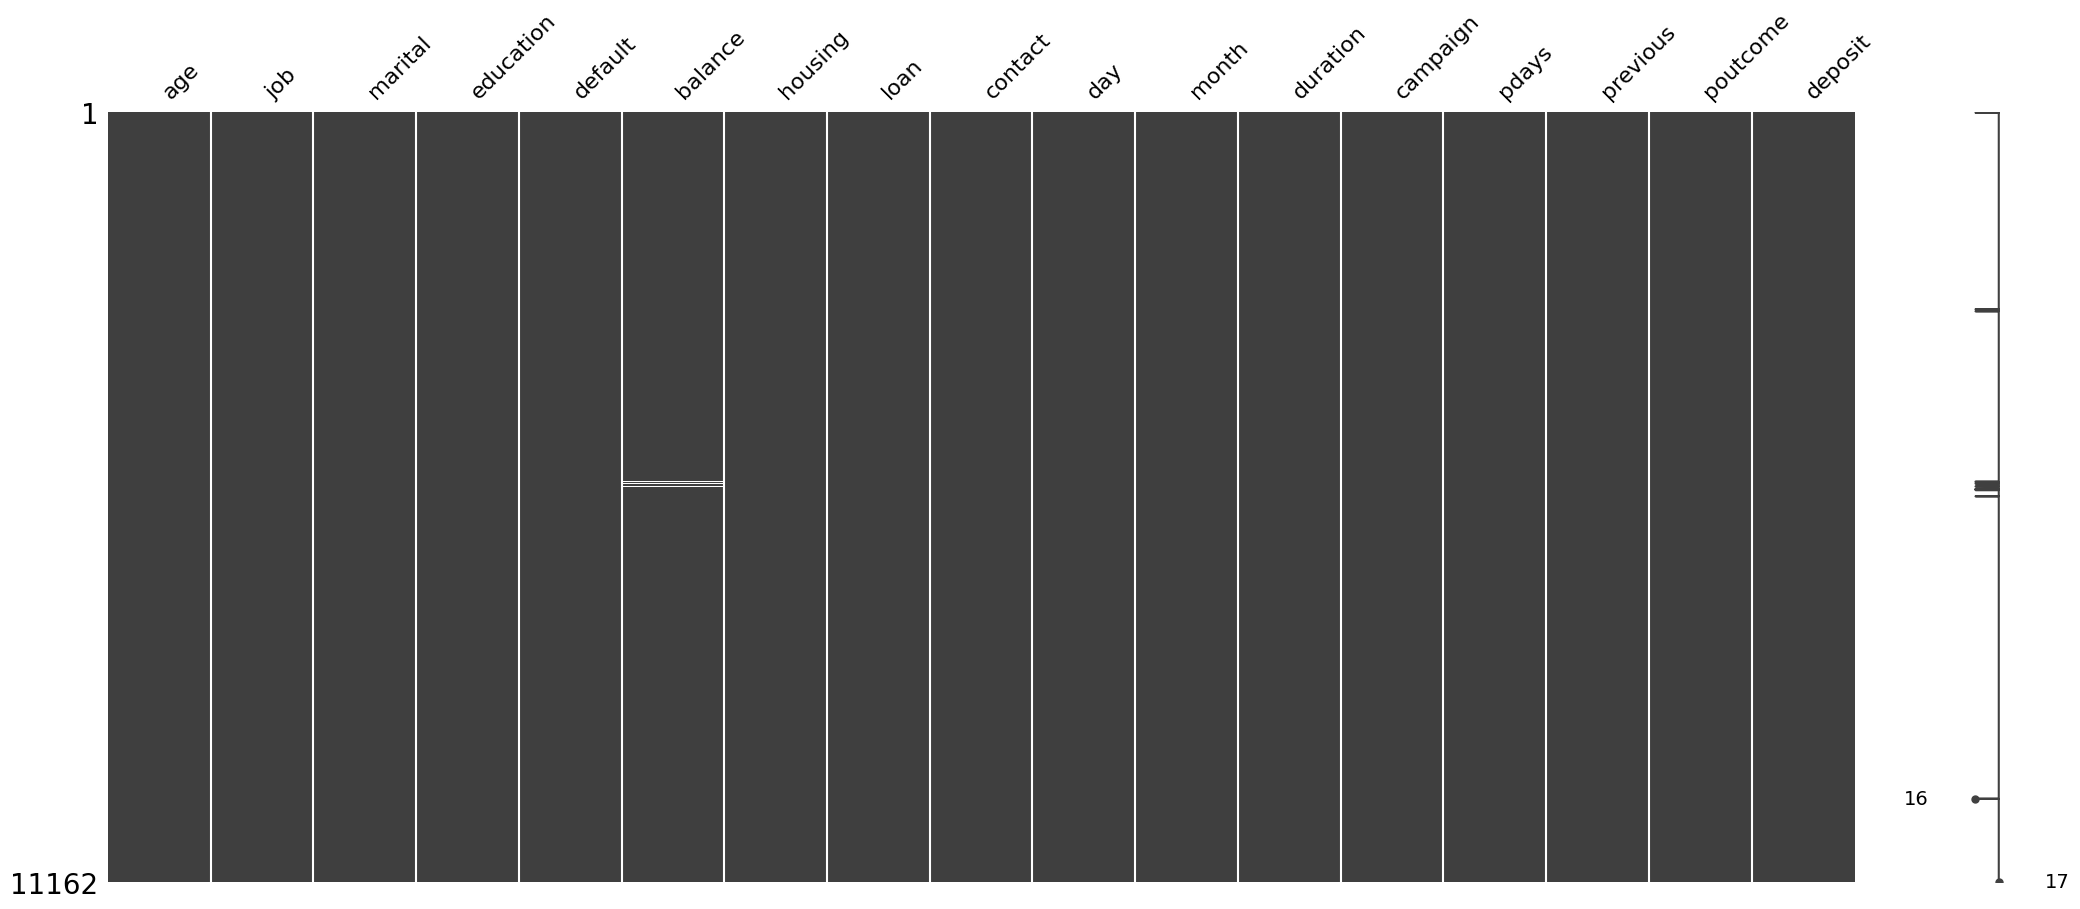

In [4]:
# Визуализируем оценку пропусков при помощи библиотеки missingno
import missingno as msno
msno.matrix(df); #матрица прпоусков

Выяснили количество пропущенных значений. Оказалось, что признак 'balance' имеет 25 пропущенных значений практически в середине таблицы. 
Однако не всё может быть так просто, и пропущенные (неизвестные) значения могут присутствовать неявным образом. Это значит, что они могут быть закодированы каким-то словом или набором символов. Например в нашем наборе данных этим значением является слово "unknown" в признаках: 'job', 'education', 'contact', 'poutcome' (всего 4 признака). Часто это не является проблемой, но это необходимо выявить.

In [5]:
# Выводим уникальные значения вышеуказанных признаков
display(df['job'].value_counts())
display(df['education'].value_counts())
display(df['contact'].value_counts())
display(df['poutcome'].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


Пропущенные значения найдены, теперь необходимо их обработать. Но на данном этапе мы не можем этого сделать, так как данные в признаке 'balance' представлены в ytкорректном виде: содержится лишняя запятая и знак доллара. По этой причине этот признак не считывается как число. Поэтому нужно преобразовать object в тип float.

### Преобработка данных

In [23]:
# Преобразовываем признак 'balance' в вещественное число (float)
df['balance']=df['balance'].str.replace(' ', '')
df['balance']=df['balance'].str.replace(',', '.')
df['balance']=df['balance'].str.replace('$', '')
df['balance']=df['balance'].astype(float)

In [8]:
# Контрольная проверка типа данных признака 'balance'
df.dtypes['balance'] 

dtype('float64')

In [9]:
# Обработываем пропуски в признаки 'balance', меняем их на медианные значения
df['balance'].fillna(df['balance'].median(), inplace = True)

In [10]:
# Контрольная проверка пропусков в данных
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Избавились от числовых пропусков в признаке 'balance'. Конечно, эти пропуски можно было бы просто удалить, их было не так много - всего 25, но мы поступим по-другому, заменив их на медианное значение баланска клиентов, чтобы не терять данные, которые пригодятся для обучения модели.

Теперь перейдём к объектовым значениям пропусков. Ранее мы выяснили, что в признаках 'job', 'education', 'contact', 'poutcome' есть пропущенные значения, которые не отображаются как пропуски в явном виде. Однако нам всё равно важно их обработать. В категориальных признаках пропущенные значения логично было бы заменить на модальные значения по данным признакам. Этим и займёмся.

In [11]:
# Выведем описание признаков, включаю категориальные
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


Признаки 'contact' и 'poutcome' трогать не будем, т.к. для построения наших будущих моделей они не будут играть важной роли.

In [12]:
# Обработаем пропуски 'uknown' категориальных признаков 'job' и 'education'
df['job']=df['job'].str.replace('unknown', 'management')
df['education']=df['education'].str.replace('unknown', 'secondary')

In [13]:
# Контрольная проверка уникальных значений в признаках 'job' и 'education'
display(df['job'].value_counts())
display(df['education'].value_counts())

job
management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64

education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64

### Поиск выбросов

In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1526.936033,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3224.829691,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,123.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1699.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Отличным помощником в поиске потенциальных выбросов является визуализация. Если признак является числовым, то можно построить гистограмму или коробчатую диаграмму, чтобы найти аномалии. При поиске выбросов нас будут интересовать два признака - возраст 'age' и счёт клиента 'balance'

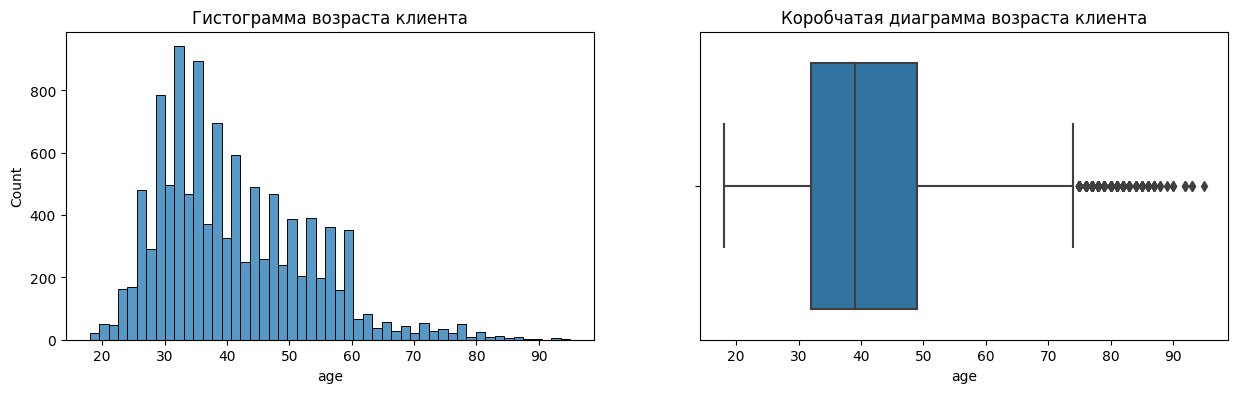

In [15]:
# Построим гистограмму и коробчатую диаграмму для признака возраста клиента ('age'):
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='age', ax=axes[0]);
histplot.set_title('Гистограмма возраста клиента');
boxplot = sns.boxplot(data=df, x='age', ax=axes[1]);
boxplot.set_title('Коробчатая диаграмма возраста клиента');

Из графиков видно, что незначительное количество клиентов находятся в возрасте более 70 лет. Вполне возможно, но на коробчатой диаграмме это кажется как выбросы. Поэтому возможно мы впоследствии от них избавимся.

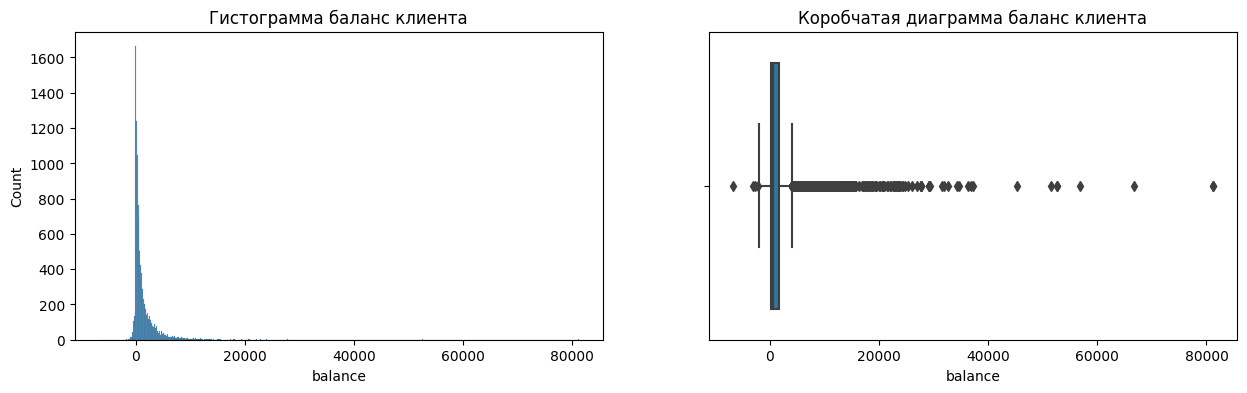

In [16]:
# Построим гистограмму и коробчатую диаграмму для признака баланс клиента ('balance'):
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='balance', ax=axes[0]);
histplot.set_title('Гистограмма баланс клиента');
boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);
boxplot.set_title('Коробчатая диаграмма баланс клиента');

Из графиков видно, что большинство клиентов держат на счёте не очень много средств. Баланс более 10.000 у.е. кажется как выбросы. На этих графиков не совсем чётко видно для принятия правильного решения, поэтому построим две гистограммы признака в обычном масштабе и в логарифмическом.

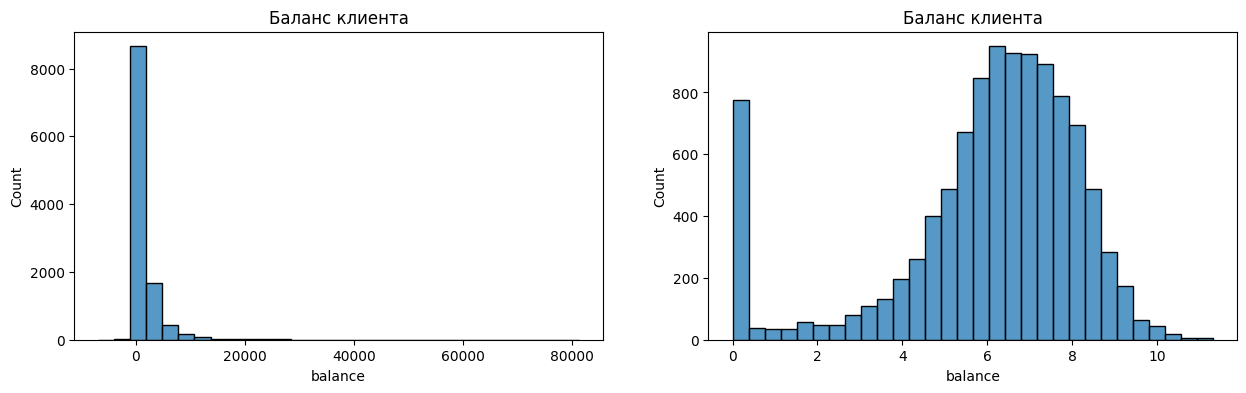

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Гистограмма исходного признака
histplot = sns.histplot(df['balance'], bins=30, ax=axes[0])
histplot.set_title('Баланс клиента');

# Гистограмма в логарифмическом масштабе
log_balance = np.log(df['balance'] + 1)
histplot = sns.histplot(log_balance , bins=30, ax=axes[1])
histplot.set_title('Баланс клиента');

Визуализация помогает определить наличие выбросов. Для того чтобы их найти, можно воспользоваться статистическими подходами. Одним из таких подходов является метод межквартильного размаха (его еще называют методом Тьюки), который используется для построения коробчатой диаграммы.

В математической статистике есть несколько подходов, позволяющих определить наличие выбросов. Мы будем считать, что выбросы находятся за пределами отрезка, нижняя граница которого определяется как нижний квартиль, из которого вычли полтора межквартильных размаха (Q1-1.5*IQR) , а верхняя граница — как верхний квартиль, к которому прибавили полтора межквартильных размаха (Q3+1.5*IQR). Найдём эти границы, и отфильтруем значения так, чтобы выбросов в данных не осталось. Применим метод Тьюки. Несмотря на то что существуют более продвинутые методы поиска аномальных значений, для обработки одного числового признака достаточно хорошо подходит метод Тьюки. 

In [24]:
# Удалим все выбросы для признака 'balance'
# Функция поиска выбросов по методу Тьюки
def outliers_iqr(data, feature): 
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 1053
Результирующее число записей: 10084


In [19]:
# Удалим все выбросы для признака 'age'
# Функция поиска выбросов по методу Тьюки
def outliers_iqr(data, feature): 
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(cleaned, 'age')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 174
Результирующее число записей: 9931


## 2. Разведывательный анализ

deposit
no     5382
yes    4549
Name: count, dtype: int64


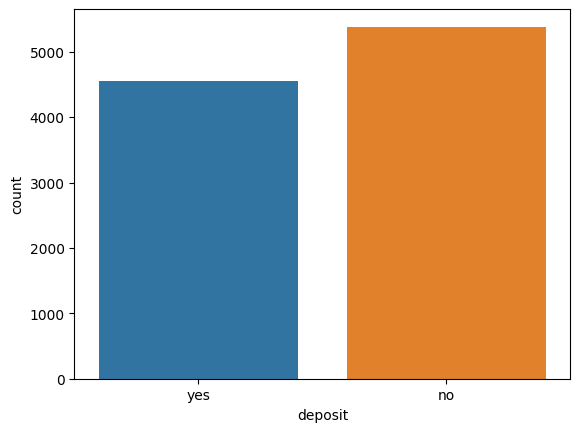

In [20]:
# Проверим данные на сбалансированность и проиллюстрируем результат
# Создадим копию датасета
df_cleaned = cleaned
# Сбалансированность классов
sns.countplot(data=df_cleaned, x='deposit');
print(df_cleaned['deposit'].value_counts())

### **Данные сбалансированы**

### Далее для детального анализа наших данных создадим целевую переменную **_'Loan_Status'_**, которая будет определять возможность одобрения кредита. Для этого согздадим условие из двух признаков: 'housing' - кредит на жильё и 'loan' - кредит на личные нужды. Если хоть одно из условий соблюдается, т.е. клиент в этом банке имеет хоть какой-то кредит, то в создаваемом признаке будет стоять ответ - 'yes', в противном случае ответ - 'no'.

In [21]:
# Создание целевой переменной по вышеуказанным условиям
df_cleaned['Loan_Status'] = np.where((df_cleaned['housing']=='yes') | (df_cleaned['loan']=='yes'), 'yes', 'no')
df_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Loan_Status
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,no
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,no


<Axes: xlabel='age_group', ylabel='count'>

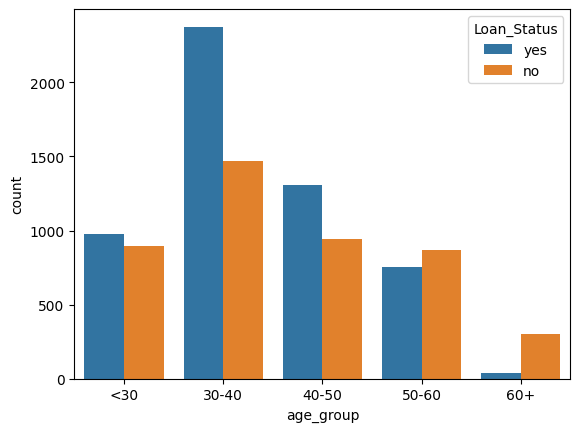

In [22]:
# Создадим признак возрастных групп и определим, в каких группах более склонны открывать кредит
# Для создания категорий используем метод cut()
df_cleaned['age_group'] = pd.cut(df_cleaned.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
sns.countplot(x="age_group", hue="Loan_Status", data=df_cleaned)

Клиенты во второй возрастой группе (от 30 до 40 лет) более склоны к оформлению кредита. Остальные возрастные группы на среднем уровне по показателям количества клиентов, за исключением категории 60+, что логично, т.к. пожилые люди менее склоны лезть в долги и банки им мгут отказывать ввиду их возраста.

### Посмотрим люди каких профессий более склоны к оформлению кредитов

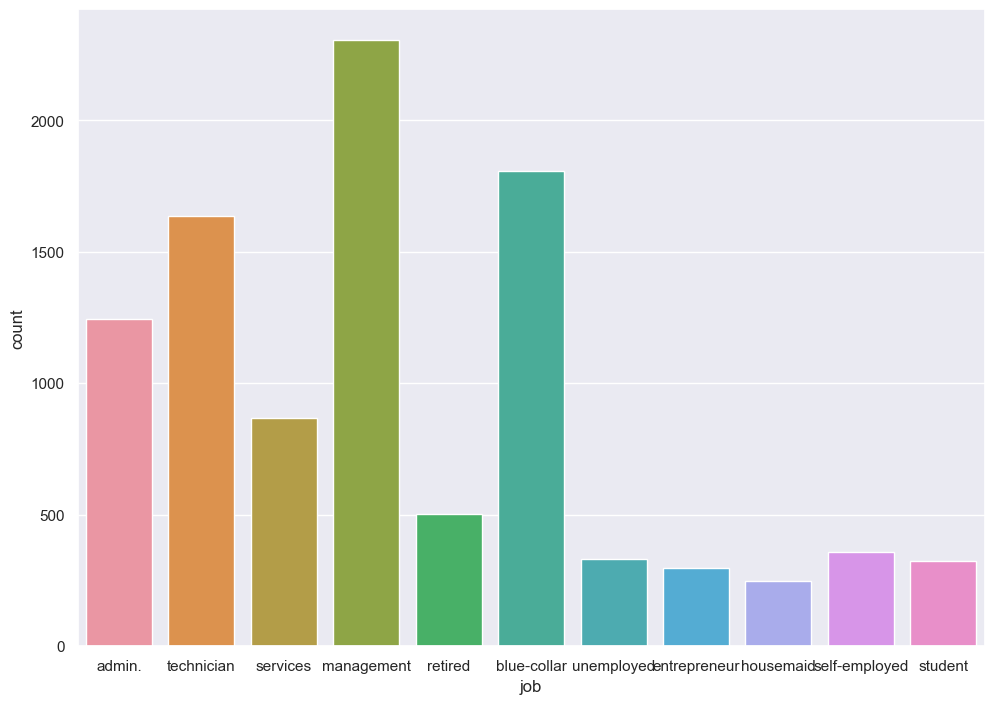

In [23]:
# Визуализация по сферам занятости
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=df_cleaned, x='job');

<Axes: xlabel='job', ylabel='count'>

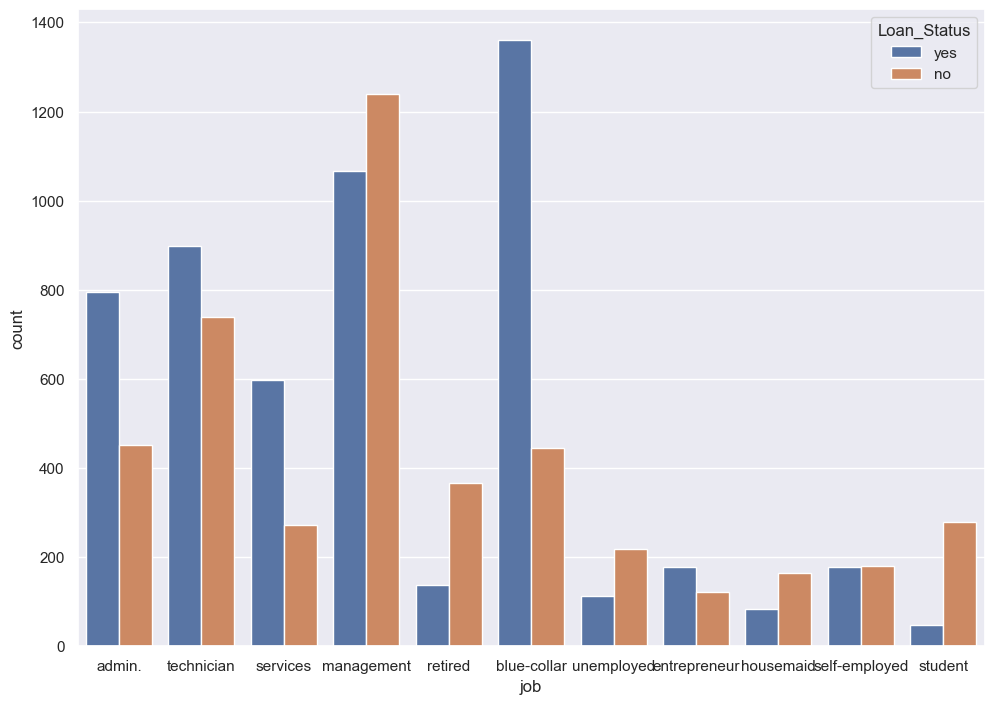

In [24]:
# Визуализация сфер занятости по открытию кредитов
sns.countplot(x="job", hue="Loan_Status", data=df_cleaned)

Эта информация может помочь банку определять надежность специальностей и сфер деятельности их клиентов, которые берут кредит.

### Обратим внимание на семейное положение

<Axes: xlabel='marital', ylabel='count'>

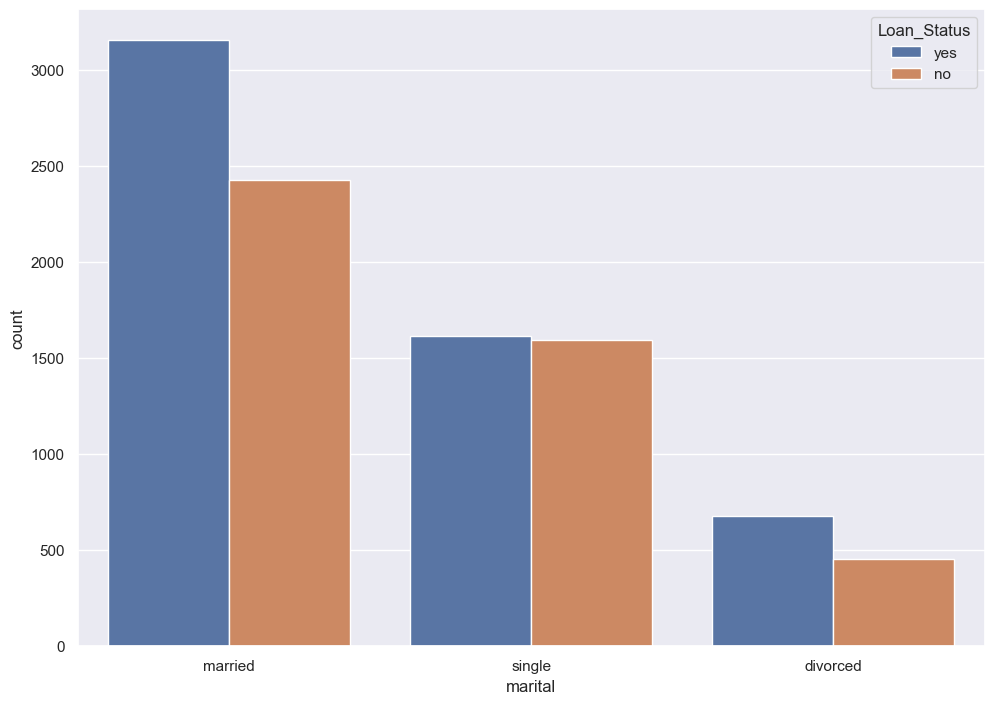

In [25]:
# Визуализация для открывших и неоткрывших кредит в зависимости от семейного статуса
sns.countplot(x="marital", hue="Loan_Status", data=df_cleaned)

Клиенты в браке чаще открывают кредиты, что само по себе закономерно, т.к. возможно им это необходимо для семейных нужд.

### Тоже самое посмотрим в зависимости от уровня образования

<Axes: xlabel='education', ylabel='count'>

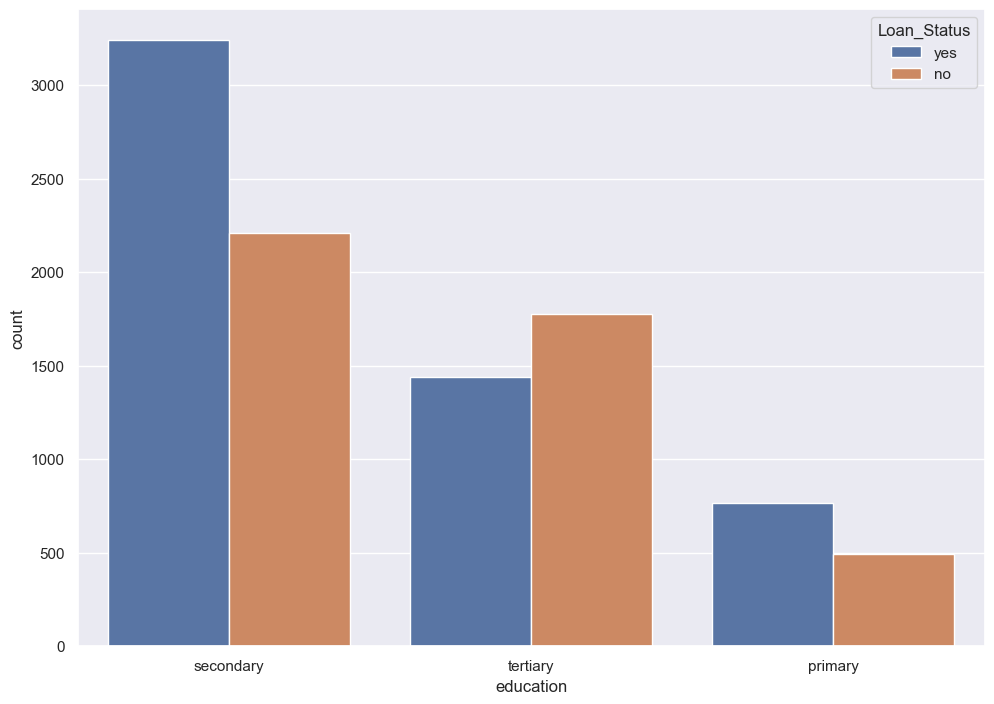

In [26]:
# Визуализация для открывших и неоткрывших кредит в зависимости от образования
sns.countplot(x="education", hue="Loan_Status", data=df_cleaned)

Также логично, и ещё одна информация для расширения кругозора банка.

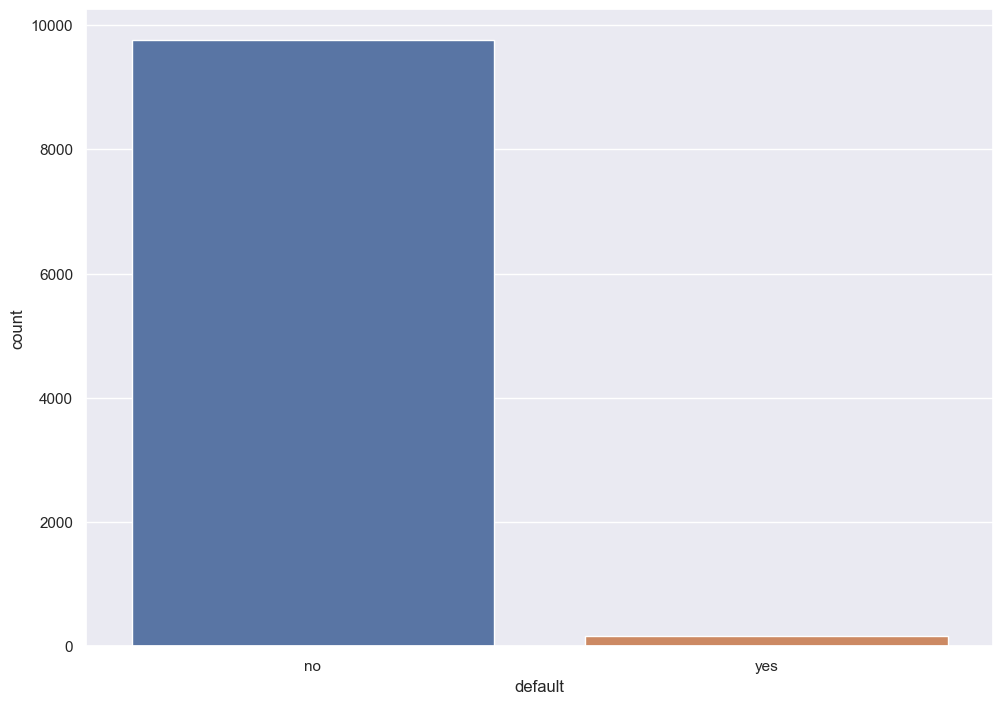

In [27]:
# Визуализация по количеству клиентов с просроченным кредитом
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=df_cleaned, x='default');

Определённо, что клиентов с просрочность задолжностью намного меньше. Но интересно посмотреть в % соотношении надёжных клиентов и должников. Построим соответствующий график.

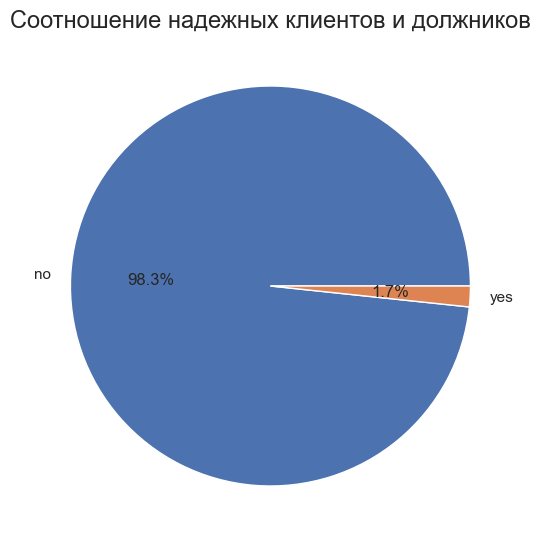

In [28]:
exited_parity = df_cleaned['default'].value_counts()
labels = 'no', 'yes'
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_parity,
    labels = labels,
    autopct = '%.1f%%',
);
title = axes.set_title('Cоотношение надежных клиентов и должников', fontsize=17)

Процент должников оказался очень низким - всего лишь менее 2%, хороший показатель для банка.

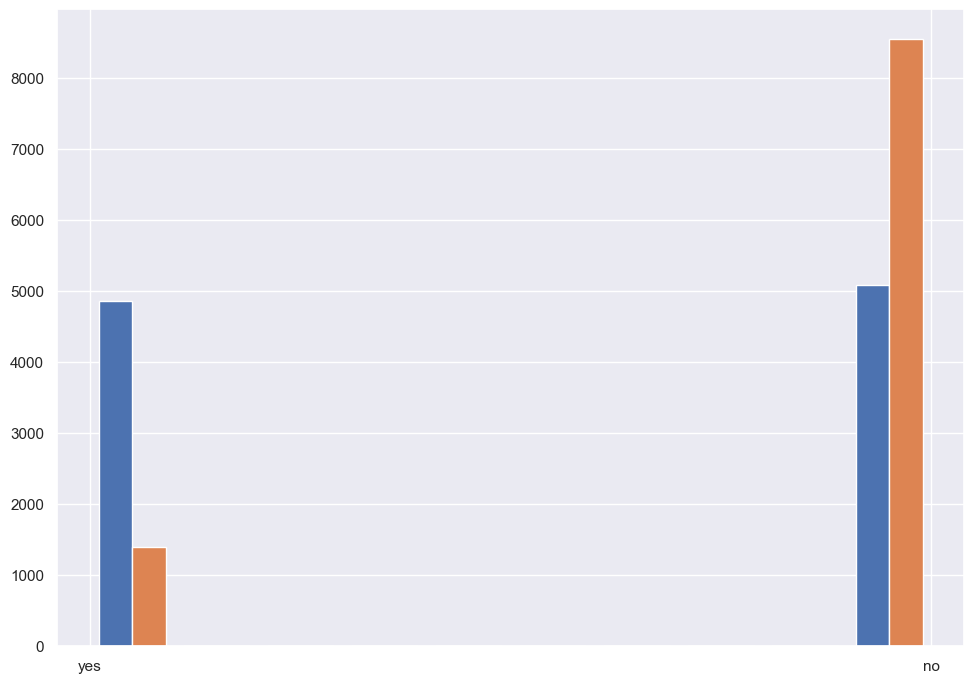

In [29]:
# Распределение оформивших кредиты
df_credit = df_cleaned[['housing', 'loan']].copy()
plt.hist(df_credit)
plt.show()

In [30]:
display(df_credit['housing'].value_counts())
display(df_credit['loan'].value_counts())

housing
no     5076
yes    4855
Name: count, dtype: int64

loan
no     8538
yes    1393
Name: count, dtype: int64

Клиентов, оформляющих кредит на жильё значительно больше, чем на личные нужды.

<Axes: xlabel='month'>

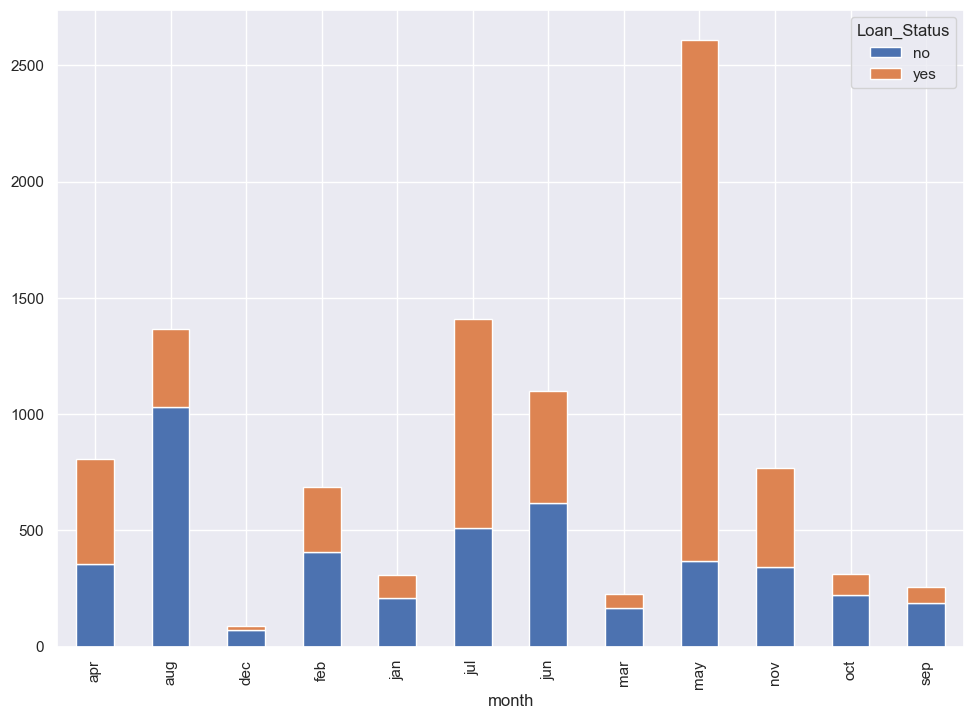

In [31]:
# График открытия кредитов в течение года по месяцам
names_month = df_cleaned.groupby("month")['Loan_Status'].value_counts(normalize=False).unstack()
names_month.plot(kind='bar', stacked='True')

Теперь давайте посмотрим на распределение столбца статуса кредита

In [32]:
import plotly.express as px

loan_status_count = df_cleaned['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count, 
                         names=loan_status_count.index, 
                         title='Статус одобрения кредита')
fig_loan_status.show()

### **Данные сбалансированы**

Посмотрим на распределение денежных средств на счетах клиентов.

In [33]:
fig_applicant_income = px.histogram(df_cleaned, x='balance', 
                                    title='Распределение баланса на счёте клиента')
fig_applicant_income.show()

На графике видно, что имеются счета с отрицательным балансом, но в основном клиенте хранят незначительную суму денежных средств на счёте - до 1000 у.е.

Теперь давайте рассмотрим взаимосвязь между балансом клиента и статусом кредита

In [34]:
fig_income = px.box(df_cleaned, x='Loan_Status', 
                    y='balance',
                    color="Loan_Status", 
                    title='Balance VS Loan_Status')
fig_income.show()

У клиентов, оформляющих кредит, состояние баланс счёта немного ниже по сравнению с клиентов, отказывающихся от услуг банка по кредитованию. При этом критичных выбросов не наблюдается.

Далее посроим сводную таблицу, чтобы определить клиенты с каким образованием и семейным статусом наиболее многочисленны оформлять кредит

In [35]:
# Визуализация закономерности между уровнем образования и семейным статусом
df_cleaned['deposit_bin'] = df_cleaned['Loan_Status'].apply(lambda x: 1 if x == 'yes' else 0)
# Сводные талицы
pivot_tables = df_cleaned.pivot_table(
                index='deposit_bin',
                columns=['marital', 'education'],
                values='Loan_Status',
                aggfunc='count')
display(pivot_tables)
# Сводная талица по семейному положению
pivot_table1 = df_cleaned.pivot_table(
                index='deposit_bin',
                columns=['marital'],
                values='Loan_Status',
                aggfunc='count')
display(pivot_table1)
fig = px.imshow(pivot_table1)
fig.show();
# Сводная талица по уровню образования
pivot_table1 = df_cleaned.pivot_table(
                index='deposit_bin',
                columns=['education'],
                values='Loan_Status',
                aggfunc='count')
display(pivot_table1)
fig = px.imshow(pivot_table1)
fig.show();

marital     divorced                    married                     single   
education    primary secondary tertiary primary secondary tertiary primary   
deposit_bin                                                                  
0                 66       223      167     357      1192      881      70  \
1                 92       418      167     564      1877      718     110   

marital                         
education   secondary tertiary  
deposit_bin                     
0                 794      729  
1                 949      557

marital,divorced,married,single
deposit_bin,,,
0,456,2430,1593
1,677,3159,1616


education,primary,secondary,tertiary
deposit_bin,,,
0,493,2209,1777
1,766,3244,1442


### **Выводы:**
Проведён разведывательный анализ данных и мы уже кое-что зузнали о наших данных: какие в целом клиенты обслуживаются в банке, а также знаете, какие возрастные и социальные группы склонны пользоваться услугами банка, в т.ч. по оформлению кредита. С помощью средств визуализации определили некоторые закономерности.

## 3. Преобразование данных

Перед началом построенияи модел необходимо произвести преобразование наших данных.

Следует помнить, что алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. По ходу работы алгоритм считает показатели (например, средние значения), которые можно вычислить только для количественных признаков. Поэтому нам необходимо преобразовать категориальные признаки в более удобный формат. Для этого придётся:
* масштабировать и трансформировать некоторые признаки для того, чтобы улучшить качество модели;
* отобрать признаки, которые мы будем использовать для обучения модели.

Начнём с обработки категориального порядкового признака, который отвечает за уровень образования: 'education'.

Обработайте его с помощью метода LabelEncoder, используя метод без дополнительных настроек.

In [36]:
# Преобразуем уровни образования
# Обработка с помощью метода LabelEncoder
label_encoder = preprocessing.LabelEncoder() 
df_cleaned['education'] = label_encoder.fit_transform(df_cleaned['education'])
df_cleaned['education'].value_counts() #контрольня проверка

education
1    5453
2    3219
0    1259
Name: count, dtype: int64

Ранее мы создали групповую переменную для возраста. Обработаем её по такому же принципу, чтобы можно было использовать возрастные группы при обучении модели.

In [37]:
# Преобразование возрастных групп
# Обработка с помощью метода LabelEncoder
label_encoder = preprocessing.LabelEncoder() 
df_cleaned['age_group'] = label_encoder.fit_transform(df_cleaned['age_group'])
df_cleaned['age_group'].value_counts() #контрольня проверка

age_group
0    3842
1    2255
4    1870
2    1625
3     339
Name: count, dtype: int64

Далее преобразуем наши целевые переменные: 'deposit' и 'Loan_Status' при помощи метода кодирования в бинарный признак, который принимает значения 1 и 0.

Также преобразуем и другие данные с ответами 'Yes' или 'No': 'deafault' (посроченный кредит), 'housing' (кредит на жилье) и 'loan' (кредит на личные нужды) в бинарные признаки.

In [38]:
# Преобразование целевых переменных в бинарные признаки
# Бинарное кодирование
df_cleaned['deposit_bin'] = df_cleaned['deposit'].apply(lambda x: 1 if x == 'yes' else 0) #признак открытия счёта
df_cleaned['Loan_Status_bin'] = df_cleaned['Loan_Status'].apply(lambda x: 1 if x == 'yes' else 0) #статус кредита
# Преобразование признаков в бинарные переменные, представленные из нулей и единиц
# Бинарное кодирование
df_cleaned['default_bin'] = df_cleaned['default'].apply(lambda x: 1 if x == 'yes' else 0) #просроченный кредит
df_cleaned['housing_bin'] = df_cleaned['housing'].apply(lambda x: 1 if x == 'yes' else 0) #кредит на жильё
df_cleaned['loan_bin'] = df_cleaned['loan'].apply(lambda x: 1 if x == 'yes' else 0) #кредит на личные нужды
df_cleaned.head() #контрольная проверка

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,deposit,Loan_Status,age_group,deposit_bin,Loan_Status_bin,default_bin,housing_bin,loan_bin
0,59,admin.,married,1,no,2343.0,yes,no,unknown,5,...,0,unknown,yes,yes,2,1,1,0,1,0
1,56,admin.,married,1,no,45.0,no,no,unknown,5,...,0,unknown,yes,no,2,1,0,0,0,0
2,41,technician,married,1,no,1270.0,yes,no,unknown,5,...,0,unknown,yes,yes,1,1,1,0,1,0
3,55,services,married,1,no,2476.0,yes,no,unknown,5,...,0,unknown,yes,yes,2,1,1,0,1,0
4,54,admin.,married,2,no,184.0,no,no,unknown,5,...,0,unknown,yes,no,2,1,0,0,0,0


Теперь необходимо преобразовать номинальные переменные, которые могут принимать несколько различных значений: 'job' (сфера занятости), 'marital' (семейное положение), 'contact' (тип контакта с клиентом), 'month' (месяц контакта) и 'poutcome' (результат маркетинговой компании).
Создайте для них dummy-переменные и добавим их в набор данных.

In [39]:
# Создаём дамми-переменные
df_dummies = pd.get_dummies(df_cleaned, columns=['job', 'marital', 'contact', 'month', 'poutcome'],
                    prefix=['job', 'marital', 'contact', 'month', 'poutcome'])
df_dummies.head() #контрольная проверка

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,no,2343.0,yes,no,5,1042,1,-1,...,False,False,True,False,False,False,False,False,False,True
1,56,1,no,45.0,no,no,5,1467,1,-1,...,False,False,True,False,False,False,False,False,False,True
2,41,1,no,1270.0,yes,no,5,1389,1,-1,...,False,False,True,False,False,False,False,False,False,True
3,55,1,no,2476.0,yes,no,5,579,1,-1,...,False,False,True,False,False,False,False,False,False,True
4,54,2,no,184.0,no,no,5,673,2,-1,...,False,False,True,False,False,False,False,False,False,True


Теперь построим матрицу корреляций для оценки мультиколлинеарность и взаимосвязи признаков с целевой переменной и дополним её тепловой картой, отражающей результат. Для вычислений удалим все нечисловые признаки. Для ранжированных коэффициентов корреляции дополненим визуализацию горизонтальной столбчатой диаграммой.

In [40]:
# Удаление ненужных признаков
df_dummies = df_dummies.drop(columns=['age', 'default', 'loan', 'housing', 'deposit', 'Loan_Status'])
df_dummies.head()

,education,balance,day,duration,campaign,pdays,previous,age_group,deposit_bin,Loan_Status_bin,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,2343.0,5,1042,1,-1,0,2,1,1,...,False,False,True,False,False,False,False,False,False,True
1,1,45.0,5,1467,1,-1,0,2,1,0,...,False,False,True,False,False,False,False,False,False,True
2,1,1270.0,5,1389,1,-1,0,1,1,1,...,False,False,True,False,False,False,False,False,False,True
3,1,2476.0,5,579,1,-1,0,2,1,1,...,False,False,True,False,False,False,False,False,False,True
4,2,184.0,5,673,2,-1,0,2,1,0,...,False,False,True,False,False,False,False,False,False,True


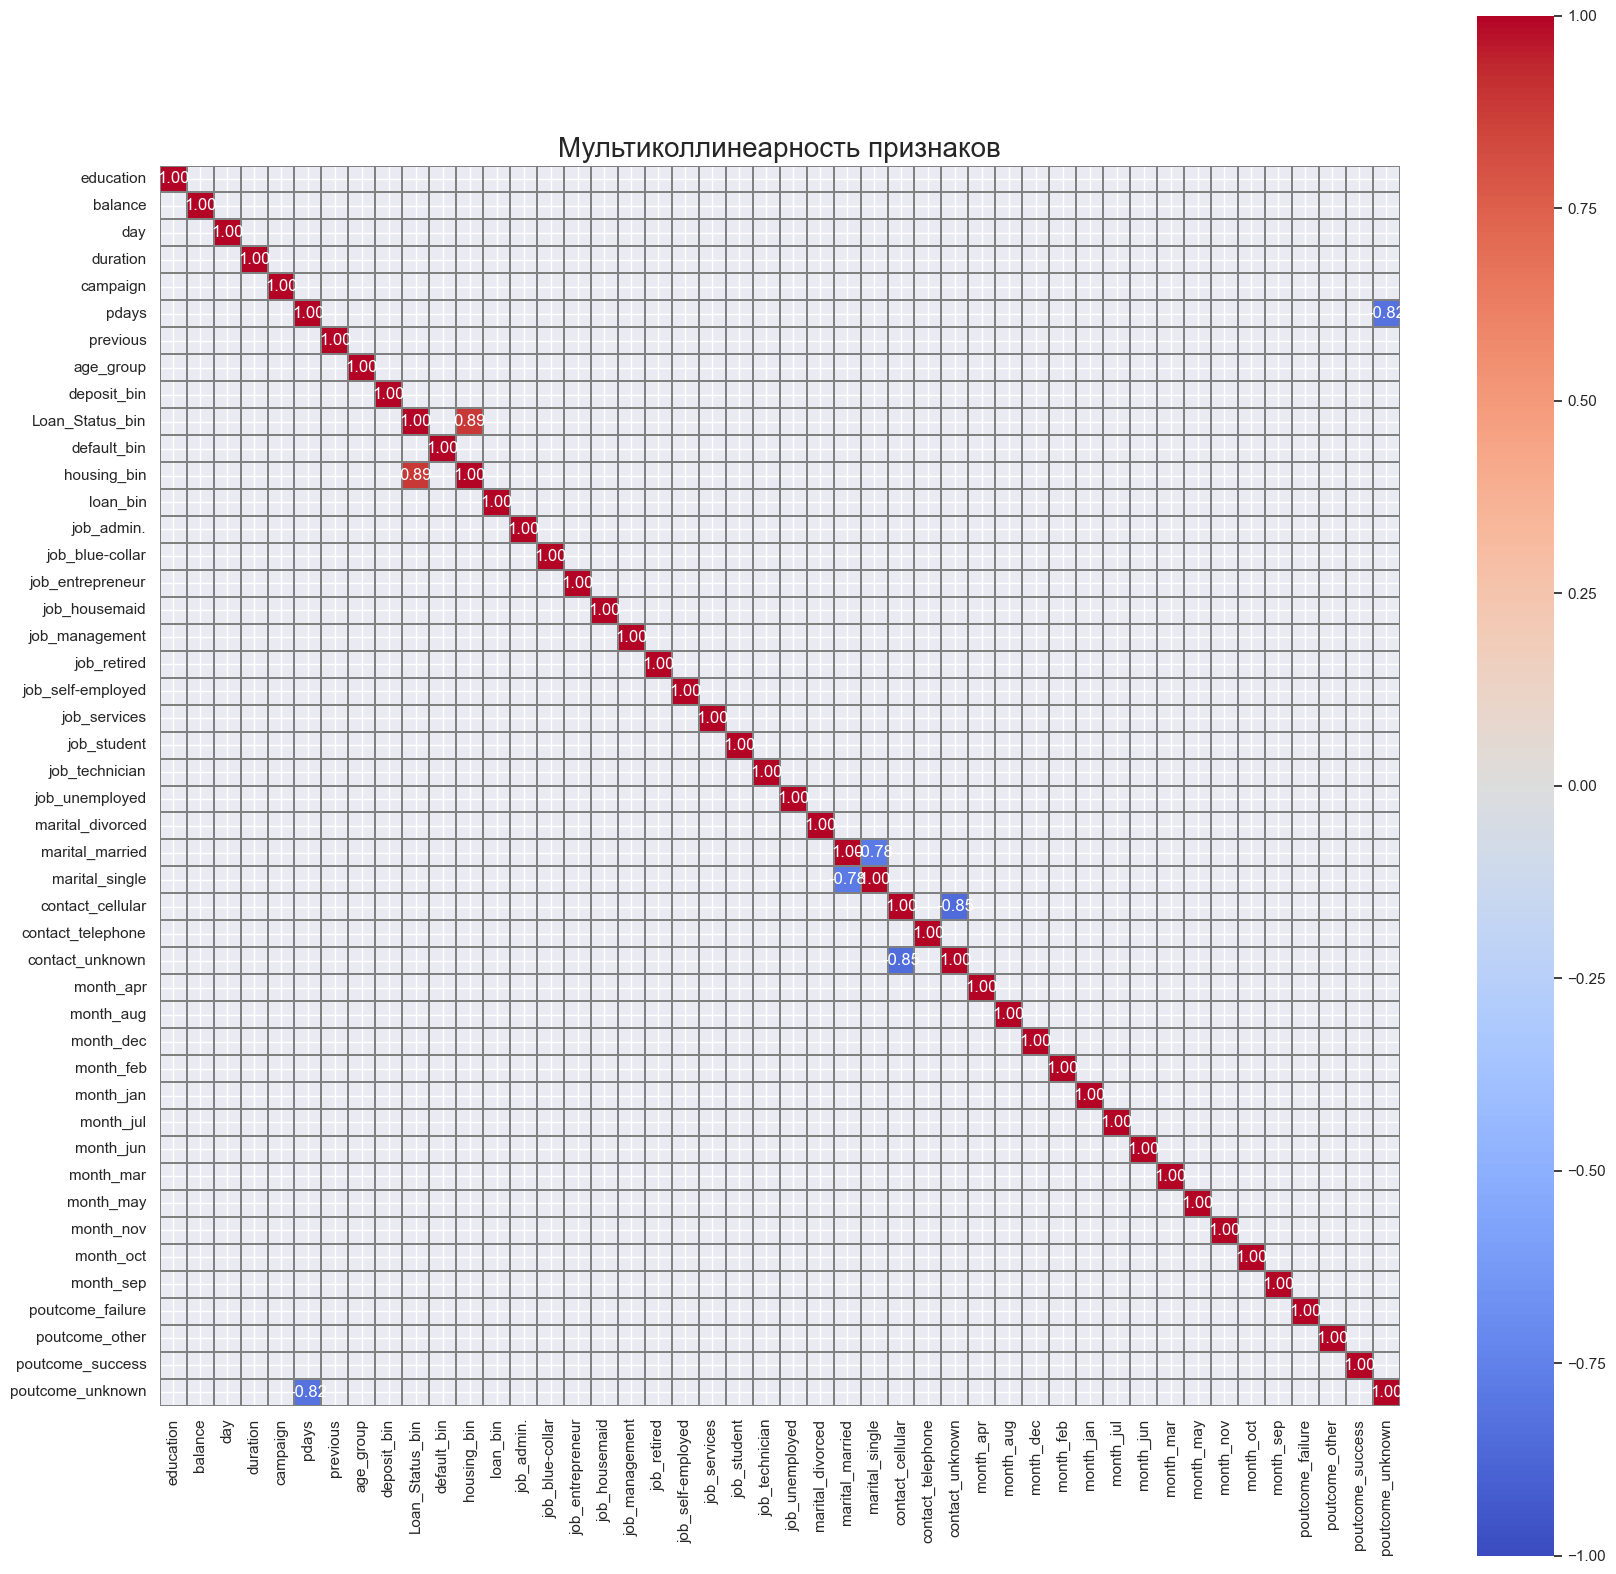

In [41]:
# Корреляционная матрица

corr = df_dummies.corr()
plt.subplots(figsize=(20, 20))

# Коэффициент корреляции не менее 0.7
ax_heat_multicoll = sns.heatmap(
    corr[corr.abs() >= 0.7], 
    vmin=-1, 
    vmax=1, 
    linewidth=0.1, 
    linecolor='gray', 
    cmap='coolwarm',
    annot = True,
    fmt='.2f',
    square=True
)

ax_heat_multicoll.set_title('Мультиколлинеарность признаков', fontsize=20);

### Достаточно сильной корреляцией будет считать значение более 0.9. В наших данных между собой сильной коррелируют два признака: 'Loan_Status_bin' (бинарное значпение статуса кредита) и 'housing_bin' (бинарное значение кредита на жильё). По ходу построения модели применим решения, что делать с этими признаками, но пока оставим их.

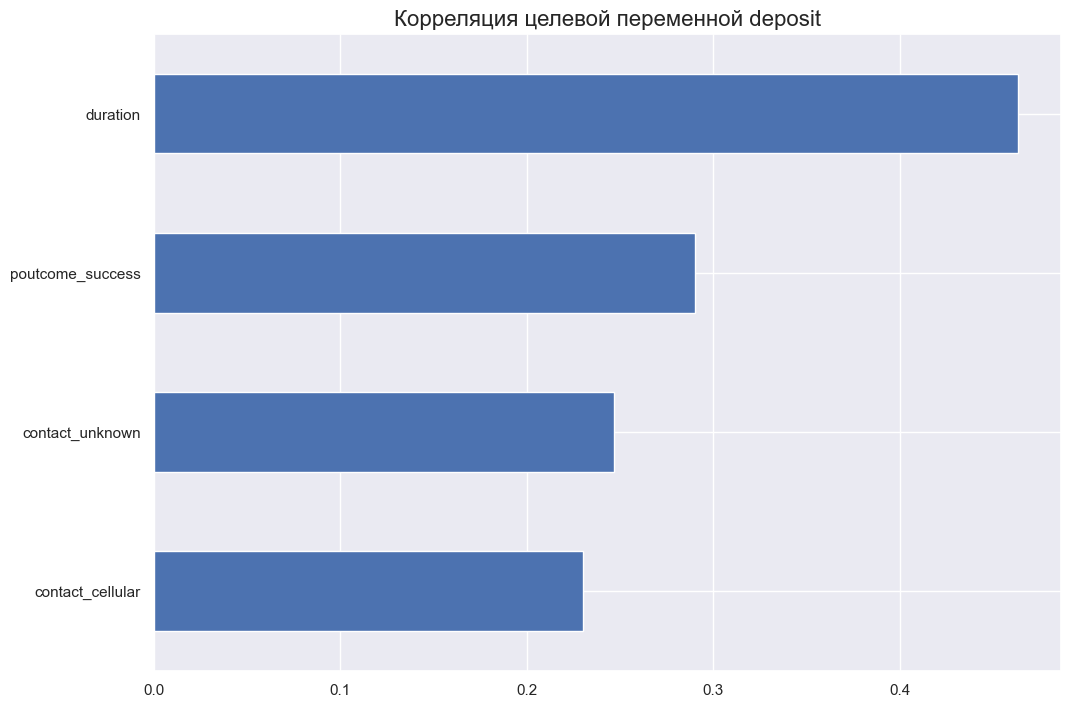

In [42]:
# Горизонтальная столбчатая диаграмма к целевой переменной 'deposit_bin'

corr["deposit_bin"].apply(lambda x: abs(x)).sort_values()[-5:-1].plot.barh()
plt.title("Корреляция целевой переменной deposit", fontsize = 16)
plt.show()

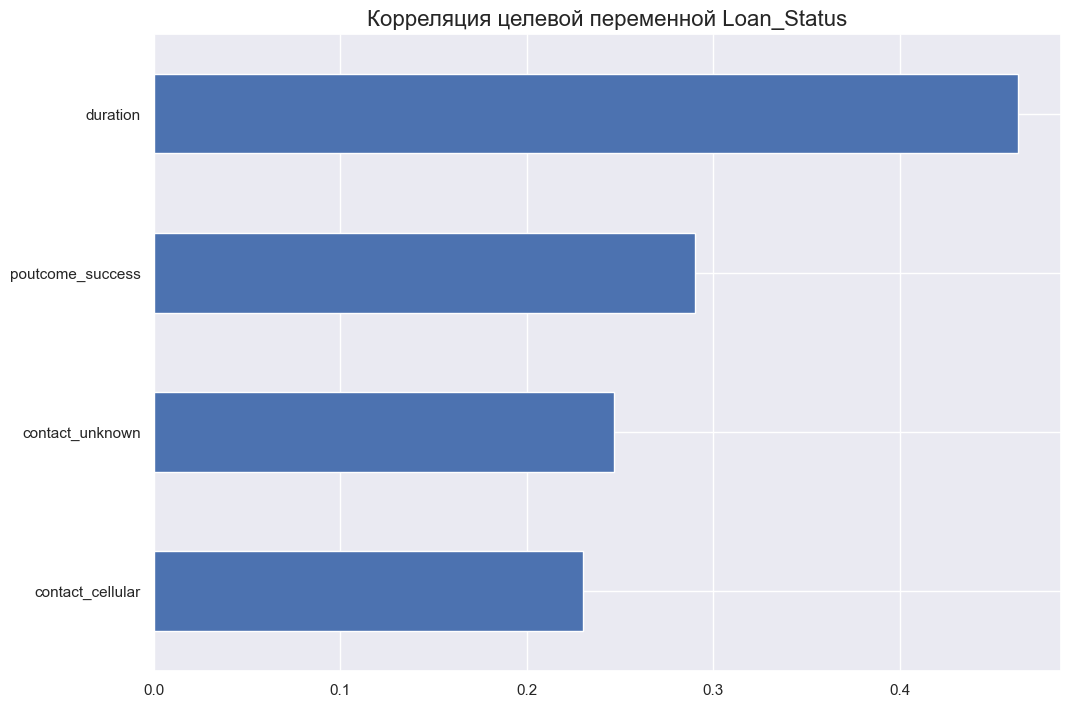

In [43]:
# Горизонтальная столбчатая диаграмма к целевой переменной 'Loan_Status_bin'

corr["deposit_bin"].apply(lambda x: abs(x)).sort_values()[-5:-1].plot.barh()
plt.title("Корреляция целевой переменной Loan_Status", fontsize = 16)
plt.show()

### Ранжирование признаков идентично для обеих целевых переменных.

Теперь начнем подготоку для построоения модели нашей первой целевой переменной 'deposit_bin' для этого определим предикторы, а также разделим выборку на обучающую и тестовую.

In [63]:
X = df_dummies.drop(['deposit_bin'], axis=1)
y = df_dummies['deposit_bin']
# При разбиении зададим параметр random_state = 42, а размер тестовой выборки возьмём за 0.35
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.35)
# добавляем аргумент, определяющий сохранение соотношений целевого признака

In [45]:
# Размеры выборок
print(f'Размер тестовой выборки {X_train.shape}, {y_train.shape[0]}')
print(f'Размер тестовой выборки {X_test.shape}, {y_test.shape[0]}')

Размер тестовой выборки (6455, 45), 6455
Размер тестовой выборки (3476, 45), 3476


На данном этапе у нас достаточно много признаков: скорее всего, не все из них будут важны. Необходимо оставить лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.
С помощью SelectKBest отберём 15 признаков, наилучшим образом подходящих для использования в задаче. Отбор реализуем по обучающей выборке, используя параметр score_func = f_classif. При этом нужно использовать только числовые признаки.

In [65]:
# Отбераем 15 наиболее подходящих признаков
selector = SelectKBest(score_func = f_classif, k=15)
selector.fit(X_train, y_train)
selector.get_feature_names_out()
selector_col = list(selector.get_feature_names_out())
selector_col

['balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_group',
 'Loan_Status_bin',
 'housing_bin',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'poutcome_success',
 'poutcome_unknown']

In [68]:
# Отбор признаков
df = df_dummies[['balance', 'duration', 'campaign', 'pdays', 
         'previous', 'age_group', 'Loan_Status_bin', 'housing_bin', 'contact_cellular', 'contact_unknown',
         'month_mar', 'month_may', 'month_oct', 'poutcome_success', 'poutcome_unknown', 'deposit_bin']]

X = df.drop(['deposit_bin'], axis=1)
y = df['deposit_bin']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.35)

Теперь нормализунм предикторы в обучающей и тестовой выборках, применив min-max-нормализацию.

In [72]:
# Нормализуем данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)                           # fit() только на train данных
X_train_scaled = scaler.transform(X_train)    # fransform() на train данных
X_test_scaled = scaler.transform(X_test)      # fransform() на test данных

## 4. Построение модели

### **4.1. Модель для целевой переменной *'deposit_bin' (открытие счёта)***

Для первой целевой перменной попробуем решить задачу классификации с применением логистической регрессии и алгоритма решающих деревьев.

Реализуем алгоритм логистической регрессии. В качестве алгоритма оптимизации будем использовать 'sag', в качестве значения параметра random_state возьмём число 42 и запустим 1000 итераций. Обучим логистическую регрессию и рассчитаем метрики качества.

In [73]:
# Логистическая регрессия
log_reg = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42, 
    max_iter=1000 )

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [74]:
# Предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)
# Вывод отчета о метриках классификации
print(f'Train data "F1 score": {metrics.f1_score(y_train, y_train_pred):.2f}')
print(metrics.classification_report(y_train, y_train_pred))
# Предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
# Вывод отчета о метриках классификации
print(f'Test data "F1 score": {metrics.f1_score(y_test, y_test_pred):.2f}')
print(metrics.classification_report(y_test, y_test_pred))

Train data "F1 score": 0.80
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3498
           1       0.84      0.76      0.80      2957

    accuracy                           0.83      6455
   macro avg       0.83      0.82      0.82      6455
weighted avg       0.83      0.83      0.83      6455

Test data "F1 score": 0.78
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1884
           1       0.82      0.74      0.78      1592

    accuracy                           0.81      3476
   macro avg       0.81      0.81      0.81      3476
weighted avg       0.81      0.81      0.81      3476



Простой алгоритм обучен. Теперь давайте обучим ещё один алгоритм — решающие деревья. В качестве параметров возьмём следующие:
* criterion = 'entropy';
* max_depth = 6; 
* random_state = 42.

Остальные параметры оставьте по умолчанию.

In [75]:
# Дерево решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    random_state=42
)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [76]:
# Предсказание для тренировочной выборки
y_train_pred = dt.predict(X_train_scaled)
# Вывод отчета о метриках классификации
print(f'Train data "F1 score": {metrics.f1_score(y_train, y_train_pred):.2f}')
print(metrics.classification_report(y_train, y_train_pred))
# Предсказание для тестовой выборки
y_test_pred = dt.predict(X_test_scaled)
# Вывод отчета о метриках классификации
print(f'Test data "F1 score": {metrics.f1_score(y_test, y_test_pred):.2f}')
print(metrics.classification_report(y_test, y_test_pred))

Train data "F1 score": 0.80
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      3498
           1       0.84      0.76      0.80      2957

    accuracy                           0.82      6455
   macro avg       0.82      0.82      0.82      6455
weighted avg       0.82      0.82      0.82      6455

Test data "F1 score": 0.78
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1884
           1       0.81      0.74      0.78      1592

    accuracy                           0.80      3476
   macro avg       0.80      0.80      0.80      3476
weighted avg       0.80      0.80      0.80      3476



Результат метрик практически не отличается и нас устроиваиват их значение. Переобучение не наблюдается. Пэтому считаем, что с первой задачей мы справились. Разумеется, у каждой модели может быть множество параметров. Перебирать их вручную, чтобы получить наилучшее качество, долго и трудозатратно. Поэтому дополнительно возможно использовать оптимизацию, чтобы перебрать сразу большое количество комбинаций различных параметров и выбрать тот вариант, при котором модель будет давать наиболее точный прогноз. Например задействовать оптимизацию гиперпараметров с помощью GridSearch, перебрав различные параметры. Или применив еще более сложные модели. Но в этом контексте мы этого делать не будет, результат нас устравиает. Перейдем к выполнение второй задачи, а именно реализации модели обучения по одобрению кредита, где необходимо будет провести отбор нужных признаков для качественного обучения модели.

### **4.2. Модель для целевой переменной *'Loan_Status_bin' (одобрение кредита)***

In [81]:
# Разделим данные на обучающие и тестовые наборы
X = df_dummies.drop(['Loan_Status_bin'], axis=1)
y = df_dummies['Loan_Status_bin']
# При разбиении зададим параметр random_state = 42, а размер тестовой выборки возьмём за 0.35
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.35)
# добавляем аргумент, определяющий сохранение соотношений целевого признака

In [83]:
# Отбераем 15 наиболее подходящих признаков
selector = SelectKBest(score_func = f_classif, k=15)
selector.fit(X_train, y_train)
selector.get_feature_names_out()
selector_col = list(selector.get_feature_names_out())
selector_col

['education',
 'balance',
 'age_group',
 'deposit_bin',
 'housing_bin',
 'loan_bin',
 'job_blue-collar',
 'job_retired',
 'job_student',
 'contact_cellular',
 'contact_unknown',
 'month_aug',
 'month_may',
 'month_oct',
 'poutcome_success']

In [84]:
# Отбор признаков
df = df_dummies[['education',
 'balance',
 'age_group',
 'deposit_bin',
 'housing_bin',
 'loan_bin',
 'job_blue-collar',
 'job_retired',
 'job_student',
 'contact_cellular',
 'contact_unknown',
 'month_aug',
 'month_may',
 'month_oct',
 'poutcome_success',
 'Loan_Status_bin']]

X = df.drop(['Loan_Status_bin'], axis=1)
y = df['Loan_Status_bin']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.35)

In [88]:
# Масштабируем числовой признак 'balance' при помощи StandardScaler
scaler = StandardScaler()
numerical_cols = ['balance']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [90]:
# Нормализуем данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)                           # fit() только на train данных
X_train_scaled = scaler.transform(X_train)    # fransform() на train данных
X_test_scaled = scaler.transform(X_test)      # fransform() на test данных

In [91]:
# Обучим модель прогнозирования одобрения кредита по алгоритму Логистическая регрессия
log_reg_credit = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42, 
    max_iter=1000 )

log_reg_credit.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [92]:
# Предсказание для тренировочной выборки
y_train_pred = log_reg_credit.predict(X_train_scaled)
# Вывод отчета о метриках классификации
print(f'Train data "F1 score": {metrics.f1_score(y_train, y_train_pred):.2f}')
print(metrics.classification_report(y_train, y_train_pred))
# Предсказание для тестовой выборки
y_test_pred = log_reg_credit.predict(X_test_scaled)
# Вывод отчета о метриках классификации
print(f'Test data "F1 score": {metrics.f1_score(y_test, y_test_pred):.2f}')
print(metrics.classification_report(y_test, y_test_pred))

Train data "F1 score": 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2911
           1       1.00      1.00      1.00      3544

    accuracy                           1.00      6455
   macro avg       1.00      1.00      1.00      6455
weighted avg       1.00      1.00      1.00      6455

Test data "F1 score": 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1568
           1       1.00      1.00      1.00      1908

    accuracy                           1.00      3476
   macro avg       1.00      1.00      1.00      3476
weighted avg       1.00      1.00      1.00      3476



Удалось добиться 100% результата.

Теперь попробуем обучить модель по одобрению кредита на другом наборе данных (неучебном) и найти применение этой модели в бизнесе для банков. Чтобы модель оказалась востребованной необходимо использовать дополнительные сведения о клиентах: сумма запрашиваемого кредита и на какой срок, доход заявителя и поручителя, а также, возможно, другая обреминительная информация.

## 5. Прогнозирование одобрения кредита с использованием стороннего набора данных

Основная цель содать модель для помощи банкам и финансовым компаниям, чтобы определять возможность одобрения кредитов для новых заявителей автоматически (возможно использовать также в мелких кредитных конторах или страховых компаниях). Например если компания хочет автоматизировать процесс получения кредита (в режиме реального времени) на основе данных клиента, предоставленных при заполнении онлайн-заявки.
Источник набора данных: Kaggle.

In [100]:
# Чтение данных
data = pd.read_csv('data/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Данные о клиентах:**

* Loan_ID (идентификатор клиента);
* Gender (пол);
* Married (семейное положение);
* Dependents (количество иждивенцев);
* Education (уровень образования);
* Self_Employed (частный предприниматель *Y/N*);
* ApplicantIncome (доход заявителя);
* CoapplicantIncome (доход поручителя);
* LoanAmount (сумма кредита);
* Loan_Amount_Term (срок кредита);
* Credit_History (кредитная история);
* Property_Area (территория проживания);
* Loan_Status (статус кредита - **целевая переменная**).

Удалим столбец с идентифкатором клиента, этот признак нам не понадобится.

In [101]:
data = data.drop('Loan_ID', axis = 1)

Обратим внимание на пропуски в данных.

In [102]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


Набор данных имеет пропущенные значения в некоторых категориальных столбцах и некоторых числовых столбцах. Давайте посмотрим на описательную статистику, прежде чем заполнять пропущенные значения:

In [104]:
# Для числовых признаков
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [105]:
# Для категориальных признаков
data.describe(include = 'object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


В категориальных столбцах заполним пропущенные данные модальрным значением каждого признака.

In [106]:
# Заполнение пропущенных значени в категориальных признаках
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

Для заполнения пропущенных значений числовых столбцов возможно выбрать следующие варианты:

1. Заполнить пропущенные значения признака суммы кредита медианным значением. Медиана является подходящей мерой для заполнения пропущенных значений при работе с перекошенными распределениями или при наличии выбросов в данных.
2. Заполнить пропущенные значения признака срока суммы кредита модальным значением столбца. Поскольку срок суммы кредита является дискретным значением, мода является подходящей панацей для использования.
3. Заполнить пропущенные значения признака кредитной истории также модальным значением. Поскольку кредитная история является двоичной переменной (0 или 1) и представляет собой наиболее распространенное значение и является подходящим выбором для заполнения пропущенных значений. Мы делали это выше, поэтому с большей долей вероятности - верное решение.

In [107]:
# Медиана для признака суммы кредита
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

# Мода для признака срок кредита
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

# Мода для признака кредитной истории
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [108]:
# Контрольная проверка пропусков
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Проведем краткий разведывательный анализ данных:

1) Проверим сбалансированность данных

In [109]:
loan_status_count = data['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count, 
                         names=loan_status_count.index, 
                         title='Статус олобрения кредита (целевая переменная)')
fig_loan_status.show()

### **Данные сбалансированы**

2) Распределение признака «Доход заявителя»

In [110]:
fig_applicant_income = px.histogram(data, x='ApplicantIncome', 
                                    title='Распределение дохода заявителя')
fig_applicant_income.show()

### **В целом данные распределены нормально**

3) Обратим внимание на выбросы

In [111]:
fig_income = px.box(data, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Статус кредита VS Доход заявителя')
fig_income.show()

Признак «Доход заявителя» содержит выбросы, которые необходимо удалить. Снова воспользуемся методом Тьюки.

In [112]:
# Применим функцию удаления выбросов для признака "Доход заявителя"

outliers, data = outliers_iqr(data, 'ApplicantIncome')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {data.shape[0]}')

Число выбросов по методу Тьюки: 50
Результирующее число записей: 564


In [113]:
fig_coapplicant_income = px.box(data, 
                                x='Loan_Status', 
                                y='CoapplicantIncome',
                                color="Loan_Status", 
                                title='Статус кредита VS Доход поручителя')
fig_coapplicant_income.show()

Признак "Доход поручителя" по кредиту также содержит выбросы. Необходимо их удалить.

In [114]:
# Применим функцию удаления выбросов для признака "Доход поручителя"

outliers, data = outliers_iqr(data, 'CoapplicantIncome')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {data.shape[0]}')

Число выбросов по методу Тьюки: 16
Результирующее число записей: 548


Проведём подробный разведывательный анализ набора данных с применением библиотеки D-Tale . Интересная особенность: библиотека предоставляет функцию экспорта кода для каждого графика или элемента анализа в отчёте. Это может оказаться полезным для финансовых учреждений (заказчика).

In [150]:
import dtale
d = dtale.show(data)
d

Теперь произведём подготовку данных для обучения модели прогнозирования одобрения кредита.

In [115]:
# Преобразование категориальных признаков в числовые
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
data = pd.get_dummies(data, columns=cat_cols)
data.head() #контрольная проверка

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,N,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True


In [116]:
# Бинарное кодирование
data['Loan_Status'] = data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0) #статус кредита

In [117]:
# Разделим данные на обучающую и тестовую выборки
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status'] #целевая переменная
# Возьмём 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Масштабируем числовые характеристики
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Воспользуемся стандартным алгоритмом Линейной регрессии. Полагаем, что в данном контексте этого будет достаточно.

In [121]:
# Обучим модель прогнозирования одобрения кредита
model = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42, 
    max_iter=1000 )

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [122]:
# Предсказание для тренировочной выборки
y_train_pred = model.predict(X_train)
# Вывод отчета о метриках классификации
print(f'Train data "F1 score": {metrics.f1_score(y_train, y_train_pred):.2f}')
print(metrics.classification_report(y_train, y_train_pred))
# Предсказание для тестовой выборки
y_test_pred = model.predict(X_test)
# Вывод отчета о метриках классификации
print(f'Test data "F1 score": {metrics.f1_score(y_test, y_test_pred):.2f}')
print(metrics.classification_report(y_test, y_test_pred))

Train data "F1 score": 0.88
              precision    recall  f1-score   support

           0       0.92      0.44      0.59       133
           1       0.80      0.98      0.88       305

    accuracy                           0.82       438
   macro avg       0.86      0.71      0.74       438
weighted avg       0.84      0.82      0.79       438

Test data "F1 score": 0.89
              precision    recall  f1-score   support

           0       0.94      0.49      0.64        35
           1       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110



Добились отличного результата с применением обычного алгоритма Линейной регрессии без переобучения и недообучения модели.

### Сделаем прогнозы на основе тестового набора

In [140]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1]


Добавим спрогнозированные значения одобрения кредита в тестовый набор в качестве нового столбца в DataFrame с именем X_test_data и покажем прогнозируемые значения одобрения кредита вместе с исходными признаками.

In [141]:
# Конвертируем значения в DataFrame
X_test_data = pd.DataFrame(X_test, columns=X_test.columns)

# Добавляем полученные значения
X_test_data['Loan_Status_Predicted'] = y_pred
X_test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Predicted
277,-0.544528,-0.037922,-0.983772,0.305159,0.402248,False,True,False,True,True,...,False,False,True,False,True,False,False,False,True,1
84,-0.067325,-0.931554,-1.571353,-1.430680,0.402248,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,1
275,-0.734870,0.334654,-0.298262,0.305159,0.402248,False,True,False,True,False,...,False,False,True,False,True,False,False,True,False,1
392,-0.824919,0.522317,-0.200332,0.305159,0.402248,False,True,False,True,True,...,False,False,True,False,True,False,False,False,True,1
537,-0.267373,-0.931554,-0.454950,0.305159,0.402248,False,True,True,False,False,...,True,False,True,False,True,False,False,True,False,1


Заменим бинарные значения 0 и 1 на "YES" и "NO" (статус одобрения кредита) понятные для заказчика.

In [142]:
X_test_data['Loan_Status_Predicted'] = X_test_data['Loan_Status_Predicted'].apply(lambda x: 'YES' if x == 1 else 'NO')

In [145]:
X_test_data['Loan_Status_Predicted'].value_counts()

Loan_Status_Predicted
YES    92
NO     18
Name: count, dtype: int64

# **Выводы и оформление работы**

Прогнозирование одобрения кредита включает анализ различных факторов, таких как финансовая история заявителя, доход, кредитный рейтинг, статус занятости и другие соответствующие атрибуты. Используя данные о кредитной итории и установочных данных клиента, ​​применив простой алгоритм машинного обучения, для компании можно создать автоматическую модель для определения одобрения кредитов для новых заявителей. Это поможет экономить время для рассмотрения соответсвующих заявок и сократить расходы на лишний штат сотрудников, который раньше выполнял эту работу в ркчном режиме.

Дополнительно также по желанию заказчика можно построить модели для классификации и сегментации клиентов с целью выработки детальных и персональных предложений для каждого клиента или группы клиентов с целью привлечения финансовых средств.

In [146]:
# Итоговый вывод данных
print(X_test_data.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term   
277        -0.544528          -0.037922   -0.983772          0.305159  \
84         -0.067325          -0.931554   -1.571353         -1.430680   
275        -0.734870           0.334654   -0.298262          0.305159   
392        -0.824919           0.522317   -0.200332          0.305159   
537        -0.267373          -0.931554   -0.454950          0.305159   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes   
277        0.402248          False         True       False         True  \
84         0.402248          False         True       False         True   
275        0.402248          False         True       False         True   
392        0.402248          False         True       False         True   
537        0.402248          False         True        True        False   

     Dependents_0  ...  Dependents_2  Dependents_3+  Education_Graduate   
277          True  ...       